In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

data = pd.read_csv('drugs.csv')

# Mostrar las primeras filas y estructura
print(data.head())
print("\nInformación del dataset:")
print(data.info())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [30]:
data['Drug_Origin'] = data['Drug'].apply(
    lambda x: 0 if x in ['drugA', 'drugB', 'drugC'] else 1
)

le = LabelEncoder()
data["Sex"]= le.fit_transform(data["Sex"])
data["BP"]= le.fit_transform(data["BP"])
data["Cholesterol"]= le.fit_transform(data["Cholesterol"])

In [31]:
X=data[["Age","Sex","BP","Cholesterol"]]
y=data["Drug_Origin"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [33]:
print(data['Drug_Origin'].value_counts())
print("y_train:", y_train.value_counts())
print("y_test:", y_test.value_counts())
print(data['Drug'].unique())

Drug_Origin
1    145
0     55
Name: count, dtype: int64
y_train: Drug_Origin
1    102
0     38
Name: count, dtype: int64
y_test: Drug_Origin
1    43
0    17
Name: count, dtype: int64
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


## Newton-cg

In [43]:
model= LogisticRegression(solver="newton-cg", max_iter=1000)
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))
print(f"accuracy:", accuracy_score(y_test, y_pred))

Intercepto (Beta0):  [0.16937732]
Pesos (Betas):  [[-0.01443366 -0.35840097  1.70454835  1.26863314]]
------------------------------------------------------
Presición global:  0.7
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.18      0.25        17
           1       0.74      0.91      0.81        43

    accuracy                           0.70        60
   macro avg       0.58      0.54      0.53        60
weighted avg       0.65      0.70      0.65        60

accuracy: 0.7


## Liblinear

In [44]:
model= LogisticRegression(solver="liblinear")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))
print(f"accuracy:", accuracy_score(y_test, y_pred))

Intercepto (Beta0):  [0.11504746]
Pesos (Betas):  [[-0.01352257 -0.35399588  1.70620229  1.27771401]]
------------------------------------------------------
Presición global:  0.7
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.18      0.25        17
           1       0.74      0.91      0.81        43

    accuracy                           0.70        60
   macro avg       0.58      0.54      0.53        60
weighted avg       0.65      0.70      0.65        60

accuracy: 0.7


## Saga

In [45]:
model= LogisticRegression(solver="saga")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))
print(f"accuracy:", accuracy_score(y_test, y_pred))

Intercepto (Beta0):  [0.13727098]
Pesos (Betas):  [[ 0.00220559 -0.02717991  0.70016397  0.28015436]]
------------------------------------------------------
Presición global:  0.7166666666666667
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.72      1.00      0.83        43

    accuracy                           0.72        60
   macro avg       0.36      0.50      0.42        60
weighted avg       0.51      0.72      0.60        60

accuracy: 0.7166666666666667


C:\Users\Josue Santana Robled\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Josue Santana Robled\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Josue Santana Robled\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Josue Santana Robled\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is i

## lbfgs

In [46]:
model= LogisticRegression(solver="lbfgs")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))
print(f"accuracy:", accuracy_score(y_test, y_pred))

Intercepto (Beta0):  [0.16756374]
Pesos (Betas):  [[-0.01441217 -0.35830355  1.70521964  1.26937554]]
------------------------------------------------------
Presición global:  0.7
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.18      0.25        17
           1       0.74      0.91      0.81        43

    accuracy                           0.70        60
   macro avg       0.58      0.54      0.53        60
weighted avg       0.65      0.70      0.65        60

accuracy: 0.7


## Sag

In [47]:
model= LogisticRegression(solver="sag")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))
print(f"accuracy:", accuracy_score(y_test, y_pred))

Intercepto (Beta0):  [0.2059797]
Pesos (Betas):  [[-0.00508809 -0.06582055  1.05159727  0.48233295]]
------------------------------------------------------
Presición global:  0.6666666666666666
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.20      0.06      0.09        17
           1       0.71      0.91      0.80        43

    accuracy                           0.67        60
   macro avg       0.45      0.48      0.44        60
weighted avg       0.56      0.67      0.60        60

accuracy: 0.6666666666666666


C:\Users\Josue Santana Robled\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [52]:
model = LogisticRegression(
    solver="saga",
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Intercepto (Beta0):", model.intercept_)
print("Pesos (Betas):", model.coef_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Intercepto (Beta0): [0.2948073]
Pesos (Betas): [[-0.01562039 -0.28609459  1.63201259  1.10299754]]
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        17
           1       0.75      0.91      0.82        43

    accuracy                           0.72        60
   macro avg       0.62      0.57      0.57        60
weighted avg       0.68      0.72      0.68        60



C:\Users\Josue Santana Robled\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


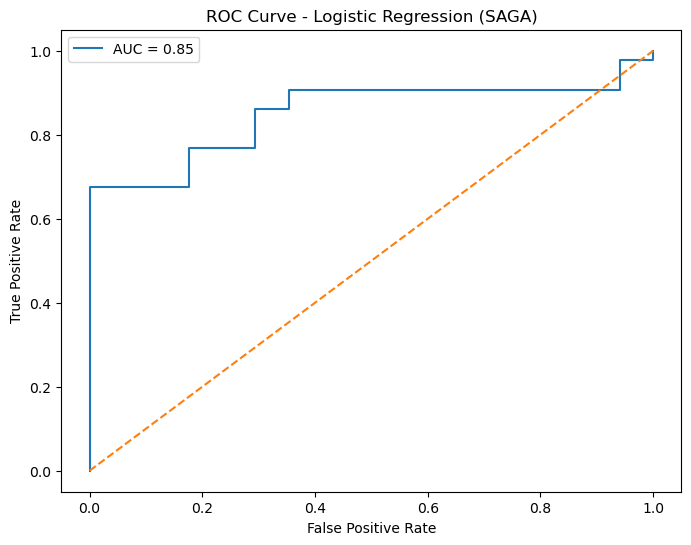

In [54]:
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (SAGA)')
plt.legend()
plt.show()